In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customer.csv')
data.reset_index(drop=True, inplace=True)

## Analysis

<!-- ^`*- -->

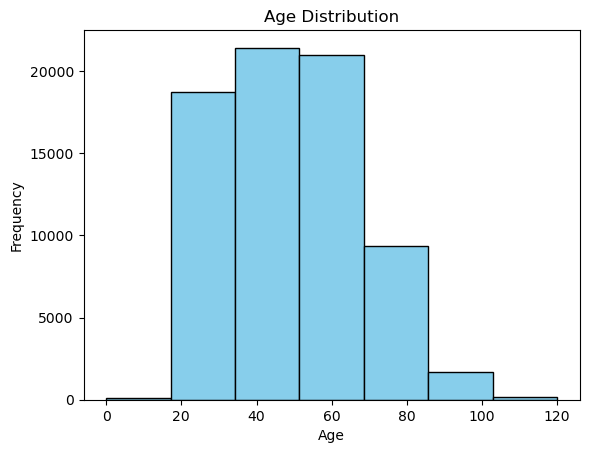

In [43]:
data['age'].plot(kind='hist', bins=7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

How affluent are they?

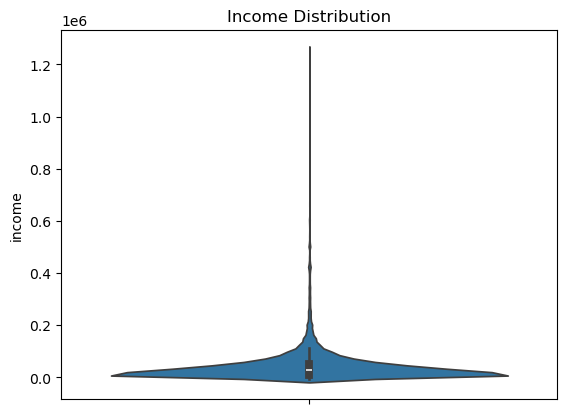

In [44]:
sns.violinplot(data['income'])
plt.title('Income Distribution')
plt.show()

In [45]:
data[['income']].describe()

,income
count,7.245800e+04
mean,4.188143e+04
std,5.827460e+04
min,-6.900000e+03
25%,1.070000e+04
50%,2.640000e+04
75%,5.200000e+04
max,1.257000e+06


Where do they live?

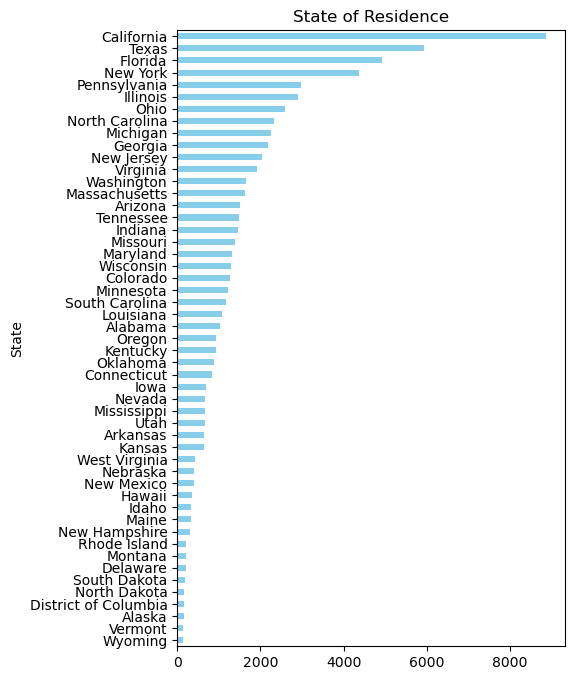

In [46]:
fig, ax = plt.subplots(figsize=(5, 8))
data['state_of_res'].value_counts().sort_values().plot(kind='barh', color='skyblue', ax=ax)
plt.title('State of Residence')
plt.ylabel('State')
plt.show()

Do you see differences in the income related to age, gender or the marital situation?

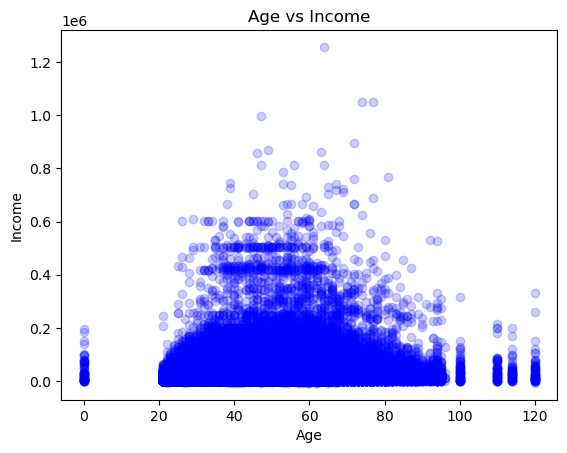

In [47]:
plt.scatter(data['age'], data['income'], color='blue', alpha=0.2)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

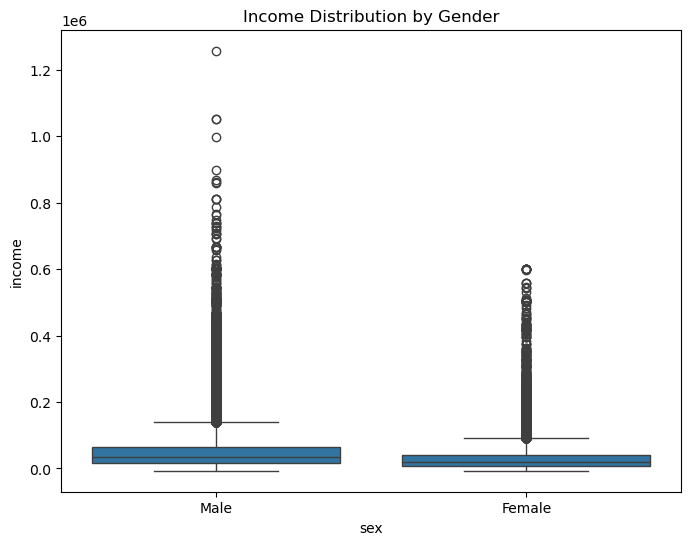

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sex', y='income')
plt.title('Income Distribution by Gender')
plt.show()

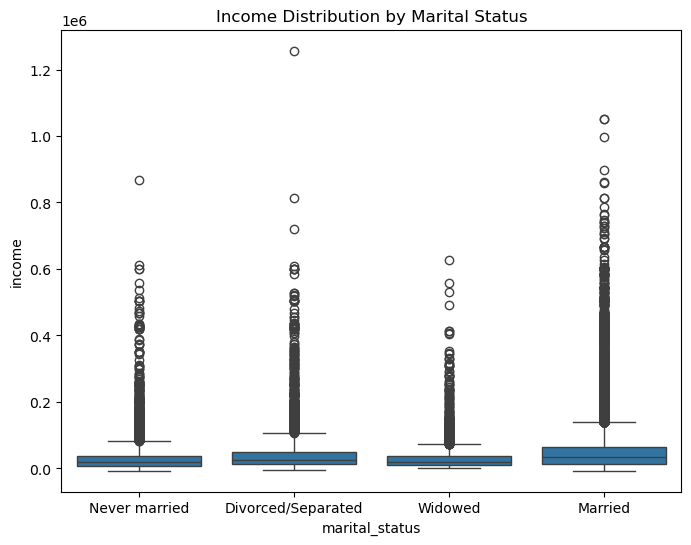

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='marital_status', y='income')
plt.title('Income Distribution by Marital Status')
plt.show()

Are the characteristics of the housing situation interrelated?

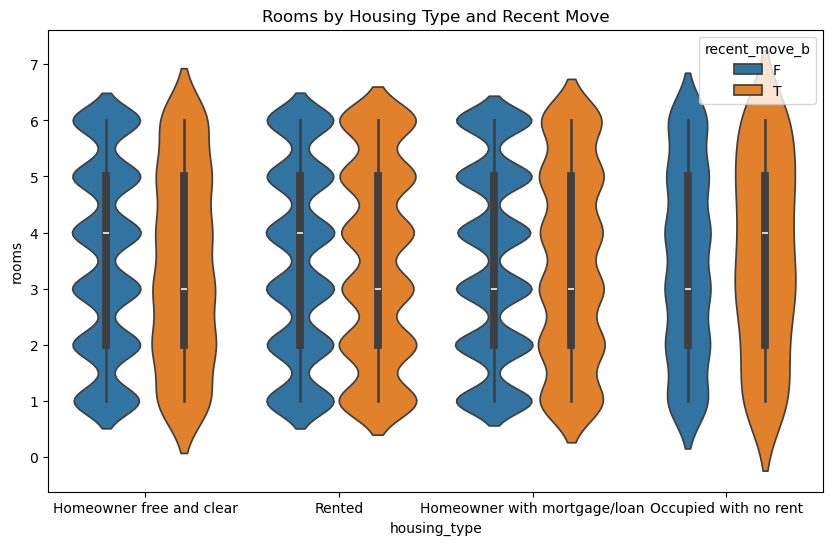

In [50]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='housing_type', y='rooms', hue='recent_move_b')
plt.title('Rooms by Housing Type and Recent Move')
plt.show()


## Checking relationships

What is the relation between age and income?

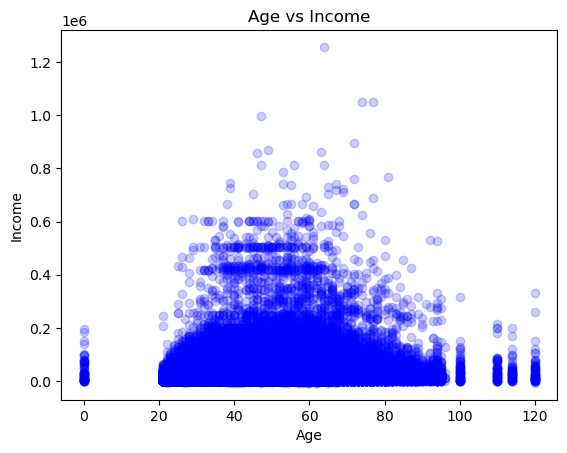

In [59]:
plt.scatter(data['age'], data['income'], color='blue', alpha=0.2)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Visualize the probability of health insurance by age?

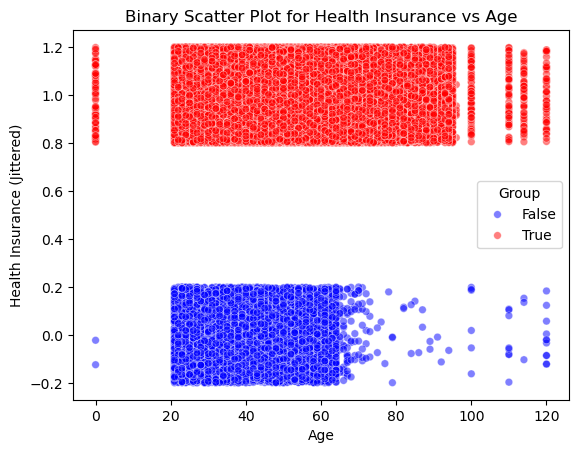

In [52]:
data_copy = data.copy()

data_copy['hi_jittered'] = data['health_ins'] + np.random.uniform(-0.2, 0.2, size=len(data))

sns.scatterplot(data=data_copy, x='age', y='hi_jittered', hue='health_ins', palette={0: 'blue', 1: 'red'}, s=30, alpha=0.5)
plt.title('Binary Scatter Plot for Health Insurance vs Age')
plt.xlabel('Age')
plt.ylabel('Health Insurance (Jittered)')
plt.legend(title='Group')
plt.show()


Visualize the marital status according to the housing type?

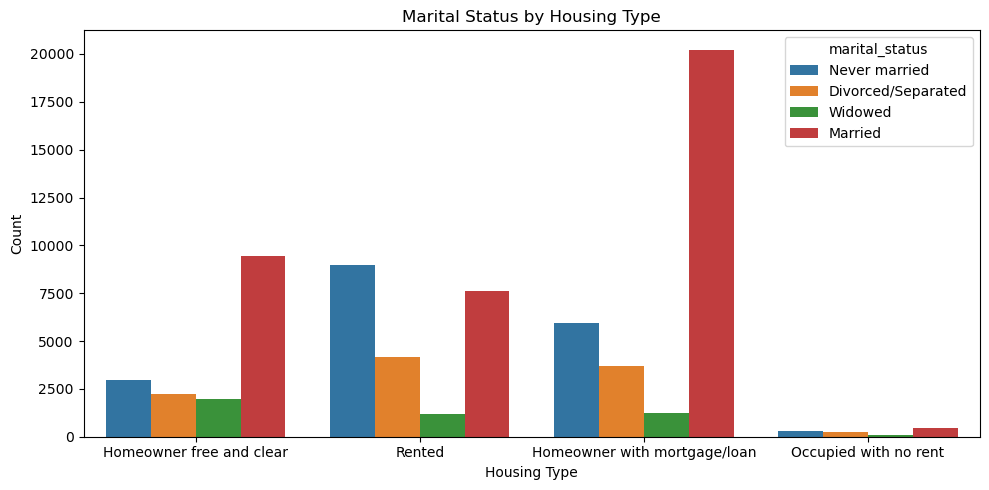

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x='housing_type', hue='marital_status', data=data)
plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

How the health insurance distributes according to the marital status (suggestion: use stacked barplots
with colored histograms per category)?

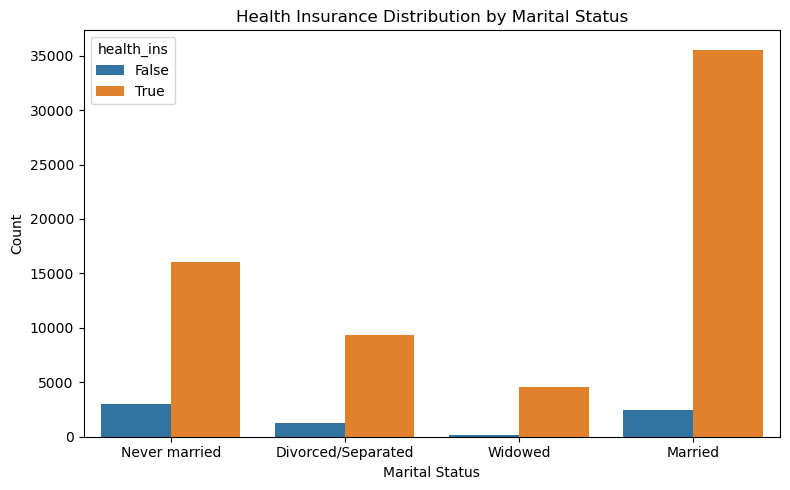

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marital_status', hue='health_ins', data=data)

plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

Explore correlations between all variables

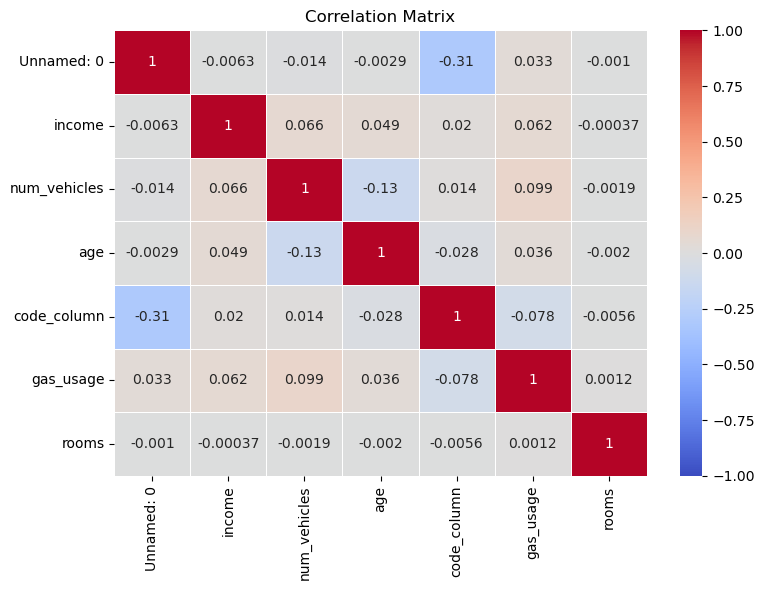

In [55]:
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


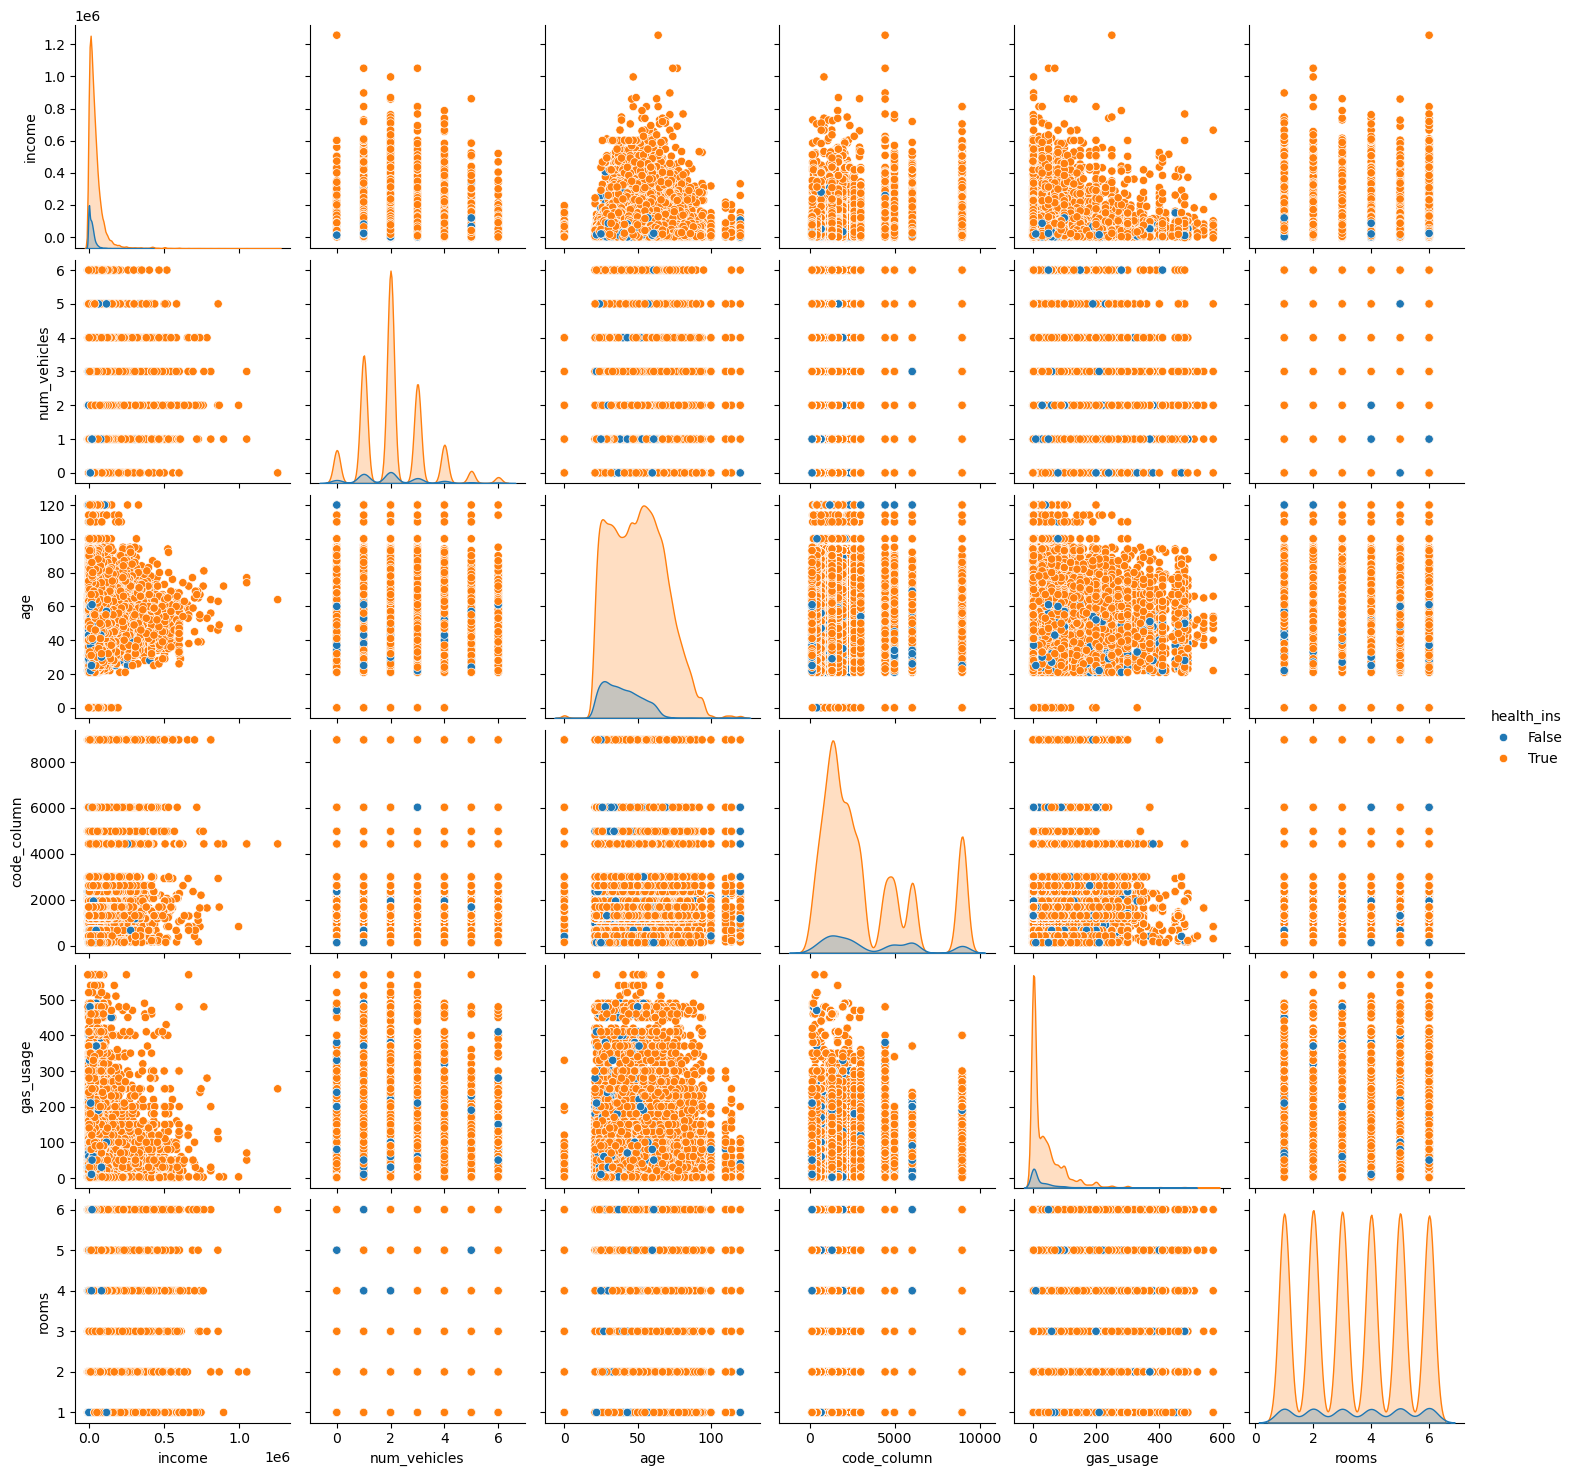

In [57]:
numeric_data_1 = numeric_data.join(data['health_ins'])
numeric_data_1.drop(columns=['Unnamed: 0'], inplace=True)

sns.pairplot(data=numeric_data_1, hue='health_ins')